# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [143]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [144]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [427]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [146]:
dataframes = [df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities]

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [147]:
for datafr in dataframes:
    print(datafr.shape)
    print(datafr.describe())
    print(f"Any NAN values?: \n {datafr.isna().any()}")

(29322, 3)
       Geographic Area           City Median Income
count            29322          29322         29271
unique              51          24249         14592
top                 PA  Franklin city           (X)
freq              1762             16          1113
Any NAN values?: 
 Geographic Area    False
City               False
Median Income       True
dtype: bool
(29329, 3)
       Geographic Area           City poverty_rate
count            29329          29329        29329
unique              51          24255          771
top                 PA  Franklin city            0
freq              1762             16         1464
Any NAN values?: 
 Geographic Area    False
City               False
poverty_rate       False
dtype: bool
(29329, 3)
       Geographic Area           City percent_completed_hs
count            29329          29329                29329
unique              51          24255                  728
top                 PA  Franklin city                  100
freq

## Data Cleaning - Check for Missing Values and Duplicates

In [148]:
df_fatalities.isna().value_counts()
df_fatalities["race"].value_counts()
df_fatalities[df_fatalities["race"].isna()]
df_fatalities["race"] = df_fatalities["race"].fillna("U")

In [149]:
df_hh_income["Median Income"].isna().value_counts()
df_hh_income[df_hh_income["Median Income"].isna()]

,Geographic Area,City,Median Income
29119,WY,Albany CDP,NaN
29121,WY,Alcova CDP,NaN
29123,WY,Alpine Northeast CDP,NaN
29126,WY,Antelope Hills CDP,NaN
29129,WY,Arlington CDP,NaN
29130,WY,Arrowhead Springs CDP,NaN
29132,WY,Atlantic City CDP,NaN
29133,WY,Auburn CDP,NaN
29139,WY,Bedford CDP,NaN
29140,WY,Bessemer Bend CDP,NaN


In [150]:
median_income_wy = df_hh_income[(df_hh_income["Median Income"].notna()) & (df_hh_income["Geographic Area"]=="WY")]["Median Income"].median()

In [151]:
df_hh_income.fillna(median_income_wy, inplace=True)

In [152]:
df_hh_income.isna().any()

Geographic Area    False
City               False
Median Income      False
dtype: bool

In [153]:
for datafr in dataframes:
    print(datafr.duplicated().value_counts())

False    29322
dtype: int64
False    29329
dtype: int64
False    29329
dtype: int64
False    29268
dtype: int64
False    2535
dtype: int64


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate? 

In [154]:
df_missing_pov_rate = df_pct_poverty[df_pct_poverty['poverty_rate'].str.contains('-')==True]

In [155]:
states_grouped = df_missing_pov_rate.mask(df_missing_pov_rate=="-").groupby("Geographic Area", as_index=False).mean()

C:\Users\ajdin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [156]:
df_filled_pct_poverty = df_pct_poverty[df_pct_poverty["poverty_rate"]!="-"]
states_filled_grouped = df_filled_pct_poverty.groupby("Geographic Area", as_index=False).median()

C:\Users\ajdin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [157]:
df_pct_poverty[df_pct_poverty["poverty_rate"].isin(["-"])]

,Geographic Area,City,poverty_rate
573,AL,Whatley CDP,-
608,AK,Attu Station CDP,-
632,AK,Chicken CDP,-
637,AK,Chisana CDP,-
662,AK,Dot Lake CDP,-
...,...,...,...
29261,WY,Oakley CDP,-
29266,WY,Owl Creek CDP,-
29273,WY,Powder River CDP,-
29289,WY,Ryan Park CDP,-


In [158]:
for index, row in df_pct_poverty.iterrows():
    if(row["poverty_rate"]=="-"):
        row["poverty_rate"] = float(states_filled_grouped[states_filled_grouped["Geographic Area"]==row["Geographic Area"]]["poverty_rate"])

In [159]:
df_pct_poverty.dtypes

Geographic Area    object
City               object
poverty_rate       object
dtype: object

In [160]:
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"])

In [161]:
df_poverty_grouped = df_pct_poverty.groupby("Geographic Area", as_index=False).median().sort_values("poverty_rate", ascending=False)

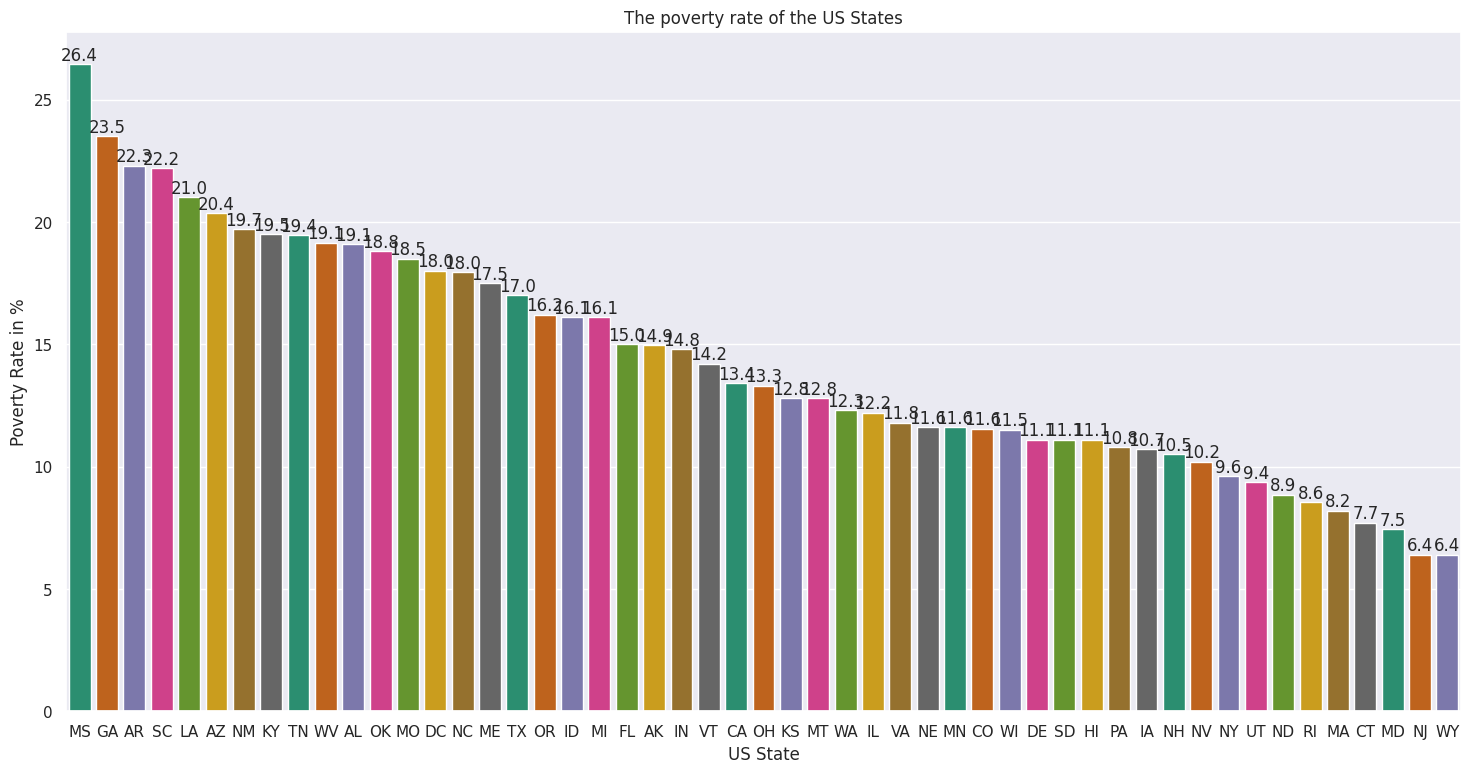

In [162]:
plt.figure(figsize=(18, 9), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.barplot(
        data=df_poverty_grouped,
        x="Geographic Area",
        y="poverty_rate",
        palette="Dark2"
    )

    ax.set(ylabel="Poverty Rate in %",
           xlabel="US State",
           title="The poverty rate of the US States")
    
    for c in ax.containers:
          ax.bar_label(c, labels=[f'{x:,.1f}' for x in c.datavalues]) 

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [163]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [164]:
df_filled_hs = df_pct_completed_hs[df_pct_completed_hs["percent_completed_hs"]!="-"]
states_hs_filled_grouped = df_filled_hs.groupby("Geographic Area", as_index=False).median()

C:\Users\ajdin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [165]:
for index, row in df_pct_completed_hs.iterrows():
    if(row["percent_completed_hs"]=="-"):
        row["percent_completed_hs"] = float(states_hs_filled_grouped[states_hs_filled_grouped["Geographic Area"]==row["Geographic Area"]]["percent_completed_hs"])

In [166]:
df_hs_grouped = df_pct_completed_hs.groupby("Geographic Area", as_index=False).median().sort_values("percent_completed_hs")

C:\Users\ajdin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


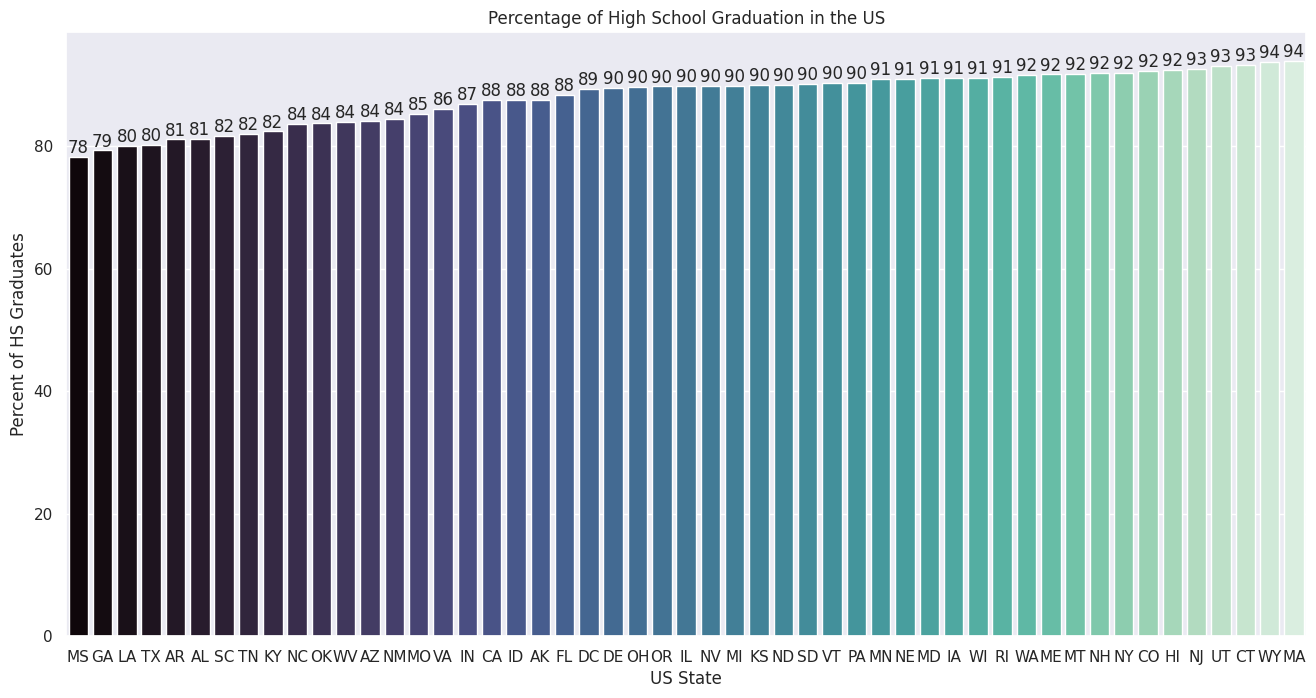

In [167]:
plt.figure(figsize=(16, 8), dpi=100)
with sns.axes_style("darkgrid"):

    sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
    ax = sns.barplot(
       data=df_hs_grouped,
        x="Geographic Area",
        y="percent_completed_hs",
        palette="mako"
    )

    ax.set(ylabel="Percent of HS Graduates",
           xlabel="US State",
           title="Percentage of High School Graduation in the US")
    
    
    for c in ax.containers:
        ax.bar_label(c, labels=[f"{x:,.0f}" for x in c.datavalues])

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [475]:
df_hs_grouped = df_hs_grouped.sort_values("Geographic Area")

In [476]:
df_poverty_grouped = df_poverty_grouped.sort_values("Geographic Area")

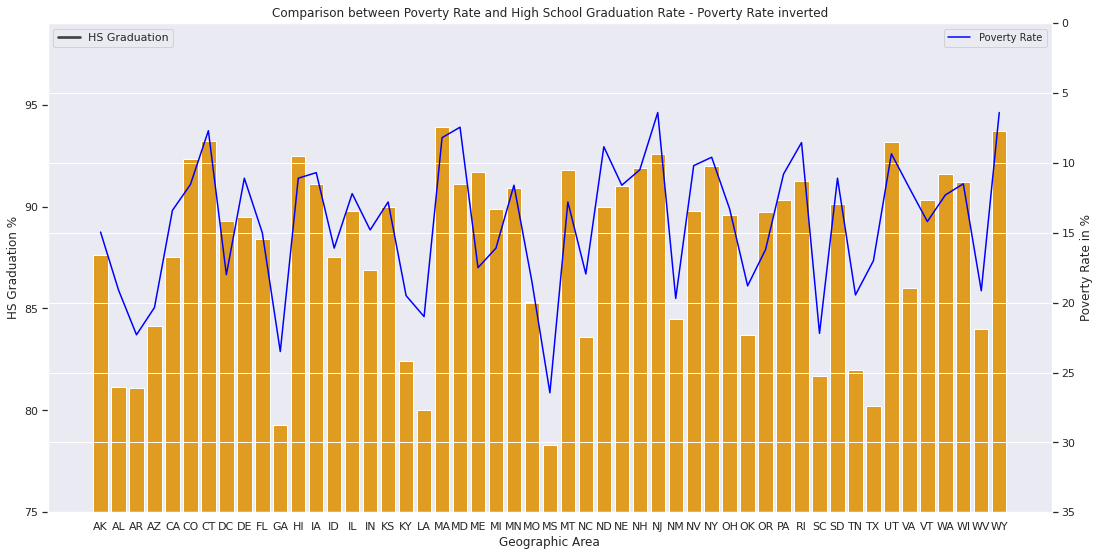

In [477]:
plt.figure(figsize=(18, 9))

with sns.axes_style("darkgrid"):
    ax1 = sns.barplot(
        data=df_hs_grouped,
        x="Geographic Area",
        y="percent_completed_hs",
        color="orange"
    )

    ax1.grid(visible=False)
    ax1.set_ylabel('HS Graduation %')
    ax1.set_ylim(75, 99)
    ax1.legend(["HS Graduation"], loc="upper left")

    ax2 = ax1.twinx()

    sns.lineplot(
        data=df_poverty_grouped,
        x="Geographic Area",
        y="poverty_rate",
        ax=ax2,
        color="blue"
    )

    ax2.set_ylabel('Poverty Rate in %')
    ax2.set_ylim(35, 0)
    ax2.legend(["Poverty Rate"], loc="upper right")
    
    plt.title("Comparison between Poverty Rate and High School Graduation Rate - Poverty Rate inverted")
    plt.setp(ax2.get_legend().get_texts(), fontsize='10') 

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

<Figure size 1296x648 with 0 Axes>

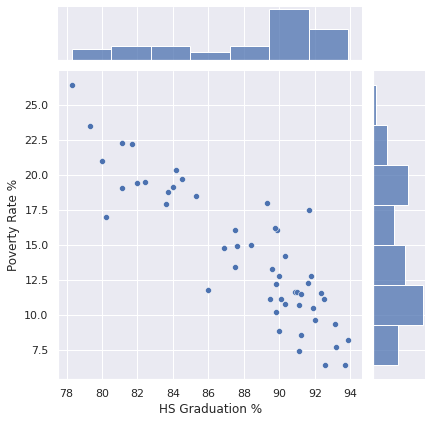

In [171]:
plt.figure(figsize=(18, 9))

with sns.axes_style("darkgrid"):
    ax = sns.jointplot(
        x=df_hs_grouped["percent_completed_hs"],
        y=df_poverty_grouped["poverty_rate"],
        kind="scatter"        
    )

    ax.set_axis_labels('HS Graduation %', 'Poverty Rate %', fontsize=12)

In [172]:
df_poverty_grouped["graduation_percent"] = df_hs_grouped["percent_completed_hs"]

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<Figure size 2400x1350 with 0 Axes>

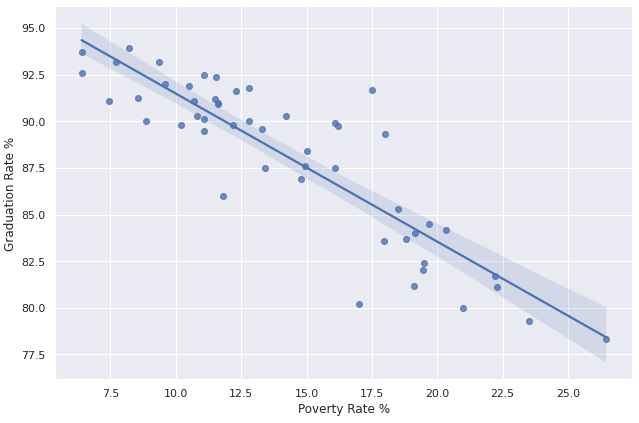

In [173]:
plt.figure(figsize=(16, 9), dpi=150)

with sns.axes_style("darkgrid"):
    plot = sns.lmplot( 
        data=df_poverty_grouped,
        x="poverty_rate",
        y="graduation_percent",
        height=6,
        aspect=1.5
    )

    plot.set_axis_labels("Poverty Rate %", "Graduation Rate %")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State


In [360]:
df_filled_race = df_share_race_city[df_share_race_city['share_hispanic']!="(X)"]
states_filled_race = df_filled_race.groupby("Geographic area", as_index=False).median()

df_not_filled_race = df_share_race_city[df_share_race_city['share_hispanic']=="(X)"]
states_not_filled_race = df_not_filled_race.groupby("Geographic area", as_index=False).median()

C:\Users\ajdin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.



In [361]:
columns = ["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]

In [456]:
for index, row in df_share_race_city.iterrows():
    if(row["share_white"]=="(X)"):
        for col in columns:
            row[col] = float(states_filled_race[states_filled_race["Geographic area"] == row["Geographic area"]][col])

In [457]:
for col in columns:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col])
    

In [458]:
df_share_race_city.dtypes

Geographic area           object
City                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object

In [365]:
df_races_grouped = df_share_race_city.groupby("Geographic area", as_index=False).median()
df_races_grouped.head()

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,39.90,0.00,38.90,0.00,1.20
1,AL,80.85,13.70,0.30,0.20,1.60
2,AR,91.10,1.60,0.40,0.10,2.20
3,AZ,79.30,0.40,2.00,0.30,12.00
4,CA,77.30,0.90,1.10,2.00,19.30


In [366]:
for index, x in df_races_grouped.iterrows():
    x_array = np.array([float(x["share_white"]), float(x["share_black"]), float(x["share_native_american"]), float(x["share_asian"]), float(x["share_hispanic"])])
    x_norm = (x_array/np.sum(x_array))
    df_races_grouped.iloc[index, df_races_grouped.columns != "Geographic area"] = x_norm

<Figure size 1800x900 with 0 Axes>

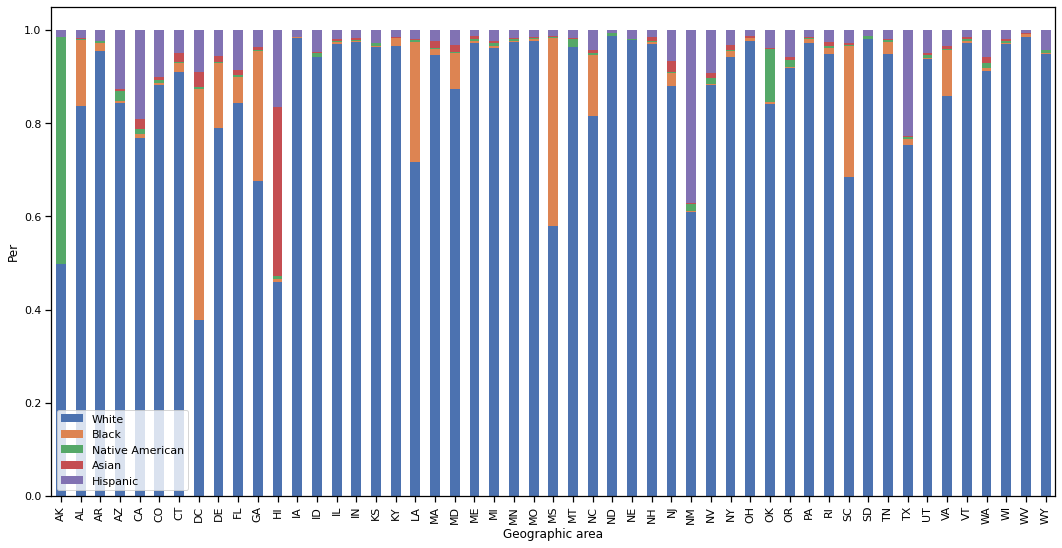

In [367]:
plt.figure(figsize=(18, 9), dpi=100)

df_races_grouped.plot(
    x="Geographic area",
    y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
    stacked=True,
    kind="bar",
    figsize=(18, 9),
    ylabel="Percentage"
)

plt.legend(["White", "Black", "Native American", "Asian", "Hispanic"])

plt.show()

# Create Donut Chart by of People Killed by Race


In [181]:
race_dict = {
    "A": "Asian",
    "B": "Black",
    "H": "Hispanic",
    "N": "Native American",
    "O": "Other",
    "U": "Unknown",
    "W": "White"
}

In [182]:
race_dict.values()

dict_values(['Asian', 'Black', 'Hispanic', 'Native American', 'Other', 'Unknown', 'White'])

In [183]:
df_fatalities.race.value_counts()

W    1201
B     618
H     423
U     195
A      39
N      31
O      28
Name: race, dtype: int64

In [184]:
df_fat_grouped = df_fatalities.groupby("race", as_index=False).count() 
df_fat_grouped.race.unique() 

array(['A', 'B', 'H', 'N', 'O', 'U', 'W'], dtype=object)

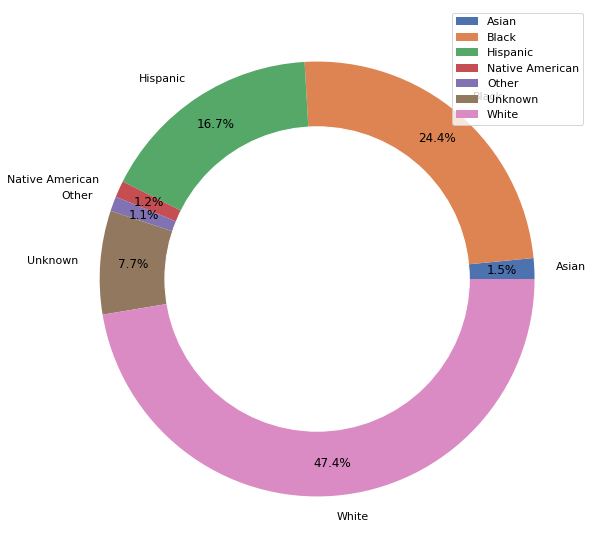

In [185]:
mylabels = race_dict.values()

fig = plt.figure()
fig.patch.set_facecolor('white')
fig.set_size_inches(10, 10)

piechart = plt.pie(
    data=df_fat_grouped,
    x="id",
    pctdistance=0.85,
    labels=mylabels,
    autopct='%1.1f%%'
)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.rcParams["text.color"] = "black"
plt.legend()
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women


In [186]:
df_genders = df_fatalities.groupby("gender", as_index=False).count()
df_genders.head()

,gender,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,F,107,107,107,107,107,104,107,107,107,107,107,104,107
1,M,2428,2428,2428,2428,2419,2354,2428,2428,2428,2428,2428,2366,2428


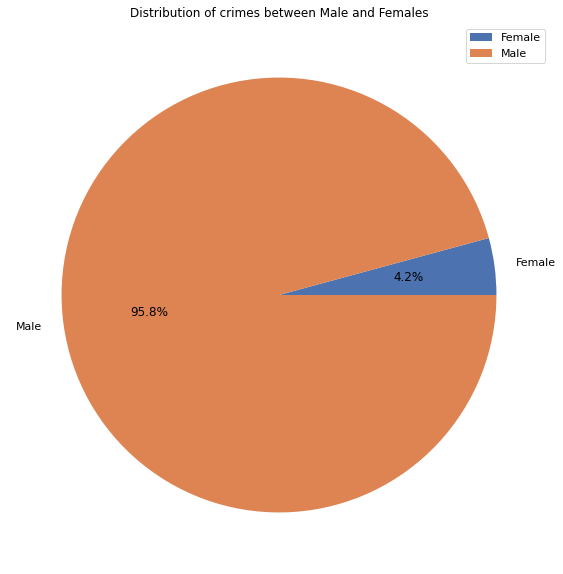

In [187]:
mylabels = ["Female", "Male"]
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.set_size_inches(10, 10)

plt.pie(
    data=df_genders,
    x="id",
    labels=mylabels,
    autopct='%1.1f%%'
)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
#p.gca().add_artist(my_circle)

plt.rcParams["text.color"] = "black"
plt.title("Distribution of crimes between Male and Females")
plt.legend()
plt.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [188]:
df_fatalities.age.isna().value_counts()

False    2458
True       77
Name: age, dtype: int64

In [189]:
df_fatalities[df_fatalities["age"].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,789,Roger Albrecht,29/08/15,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,839,Lawrence Price,17/09/15,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,908,Jason Day,12/10/15,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,1283,John Tozzi,24/10/15,shot,gun,NaN,M,U,New Paltz,NY,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2773,TK TK,12/07/17,shot,blunt object,NaN,M,U,Grover Beach,CA,False,other,Not fleeing,False
2496,2781,TK TK,15/07/17,shot,gun,NaN,M,U,Arlington,TX,False,attack,Foot,False
2521,2806,TK TK,26/07/17,shot,gun,NaN,M,U,San Antonio,TX,False,attack,Not fleeing,False
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False


In [190]:
median_age = df_fatalities[df_fatalities["age"].notna()]["age"].median()
df_fatalities["age"] = df_fatalities["age"].fillna(median_age)

In [191]:
df_fatalities.age = pd.to_numeric(df_fatalities.age)

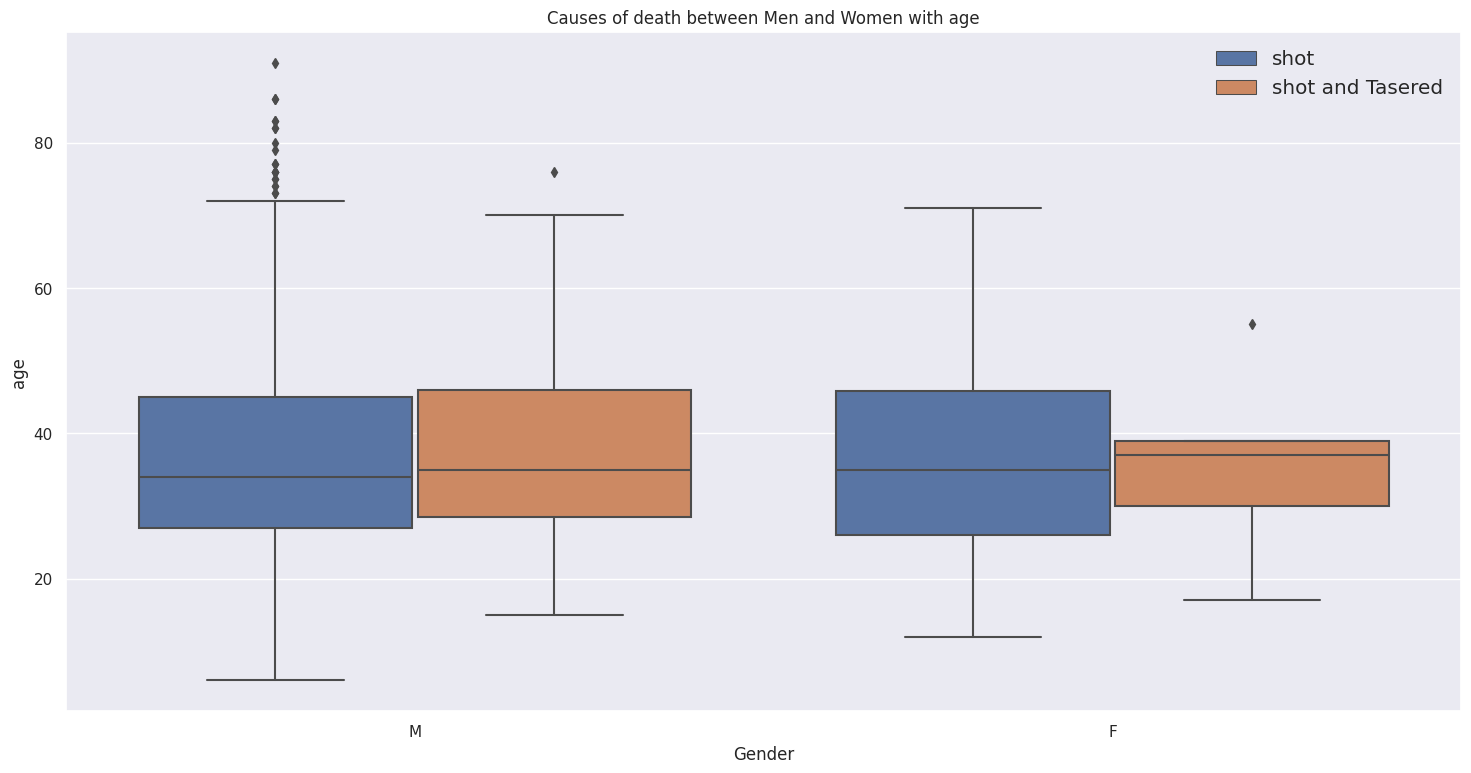

In [192]:
plt.figure(figsize=(18, 9), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.boxplot(
        data=df_fatalities,
        x="gender",
        y="age",
        hue="manner_of_death",
        width=0.8
    )

    ax.set(
        xlabel="Gender",
        title="Causes of death between Men and Women with age"
    )

    sns.set(font_scale=1)
    
    plt.legend(bbox_to_anchor=(1, 1),
               fontsize="large",
               frameon=False,
               )
    ax.set_axes_locator

# Were People Armed? 
In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [193]:
df_fatalities["weapon"] = df_fatalities["armed"]

In [194]:
df_fatalities.loc[df_fatalities[df_fatalities["armed"]!="unarmed"]["armed"].index, "armed"] = "Yes"
df_fatalities.loc[df_fatalities[df_fatalities["armed"]=="unarmed"]["armed"].index, "armed"] = "No"

In [195]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weapon
0,3,Tim Elliot,02/01/15,shot,Yes,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,gun
1,4,Lewis Lee Lembke,02/01/15,shot,Yes,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,gun
2,5,John Paul Quintero,03/01/15,shot and Tasered,No,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,unarmed
3,8,Matthew Hoffman,04/01/15,shot,Yes,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,toy weapon
4,9,Michael Rodriguez,04/01/15,shot,Yes,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,nail gun


In [196]:
df_armed = df_fatalities[["armed", "id"]].groupby("armed", as_index=False).count().sort_values("armed")
df_armed

,armed,id
0,No,171
1,Yes,2364


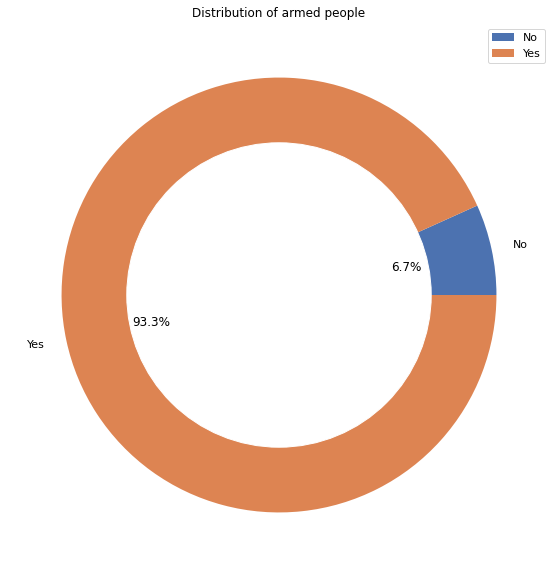

In [197]:
my_labels = ["No", "Yes"]
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.set_size_inches(10, 10)

plt.pie(
    data=df_armed,
    x="id",
    labels=my_labels,
    autopct='%1.1f%%'
)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.rcParams["text.color"] = "black"
plt.title("Distribution of armed people")
plt.legend()
plt.show()


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [198]:
ages = df_fatalities["age"]

bins = [6, 18, 25, 30, 35, 40, 50, 60, 70, 90]
labels = ['6-17', '18-24', '25-30', "31-35", "36-40", '41-49', '50-59', '60-69', '70+']
df_fatalities['agerange'] = pd.cut(ages, bins, labels = labels,include_lowest = True)

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [199]:
np.arange(start=df_fatalities["age"].min(), stop=df_fatalities["age"].max(), step=2)
len(df_fatalities["age"].unique())

73

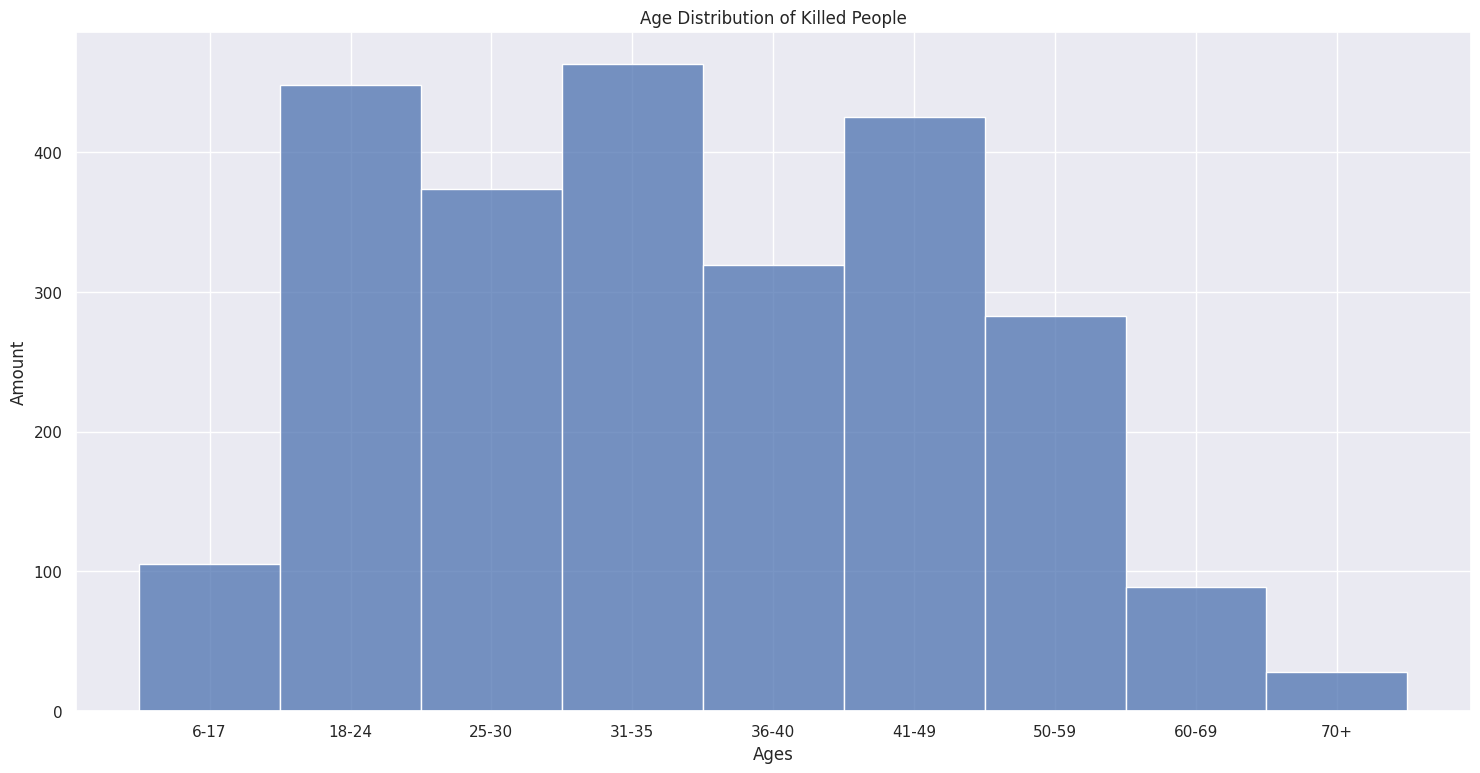

In [200]:
plt.figure(figsize=(18, 9), dpi=100)
with sns.axes_style("darkgrid"):
    ax = sns.histplot(
        data=df_fatalities,
        x="agerange"
    )

    ax.set(
        title="Age Distribution of Killed People",
        ylabel="Amount",
        xlabel="Ages"
    )



Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [201]:
df_races_fat_grouped = df_fatalities.groupby("race", as_index=False).count()
df_races_fat_grouped

,race,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weapon,agerange
0,A,39,39,39,39,39,39,39,39,39,39,39,37,39,39,39
1,B,618,618,618,618,618,618,618,618,618,618,618,605,618,614,618
2,H,423,423,423,423,423,423,423,423,423,423,423,411,423,422,423
3,N,31,31,31,31,31,31,31,31,31,31,31,29,31,31,31
4,O,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
5,U,195,195,195,195,195,195,195,195,195,195,195,182,195,192,195
6,W,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201,1178,1201,1200,1200


In [202]:
races_list = df_fatalities.race.unique()

In [203]:
df_fatalities.age = pd.to_numeric(df_fatalities["age"]) 

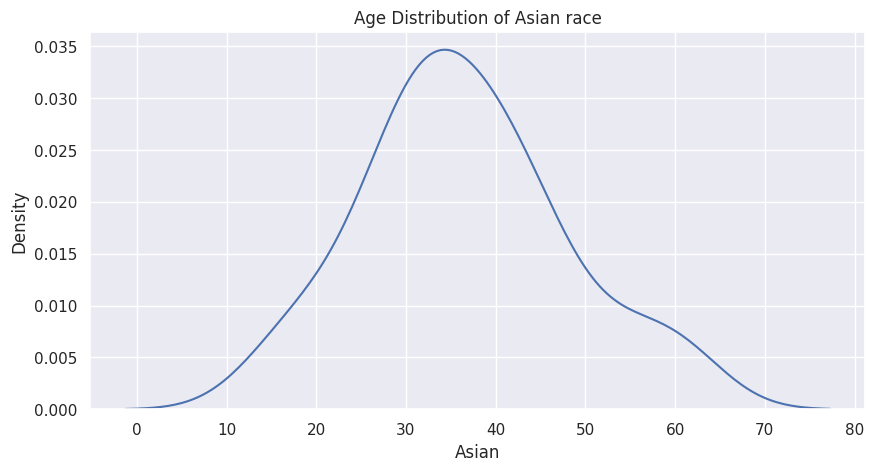

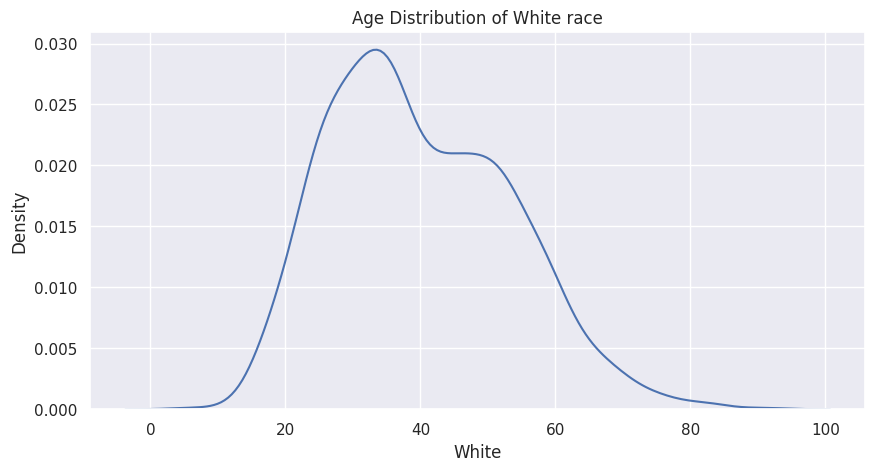

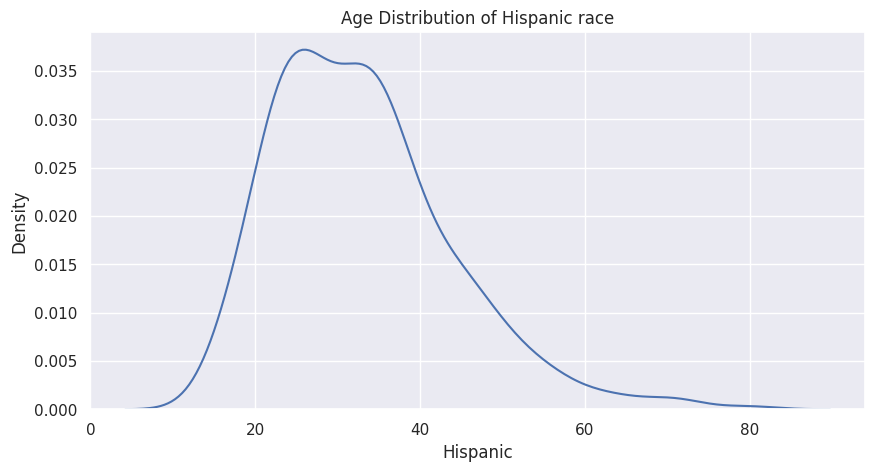

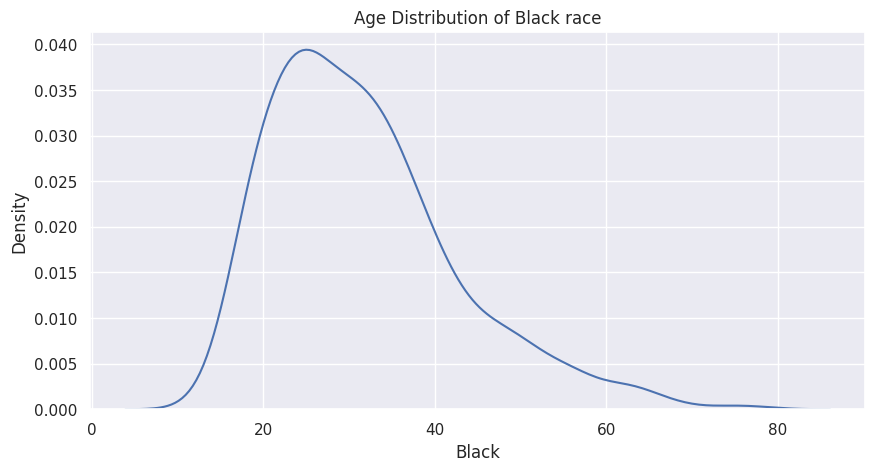

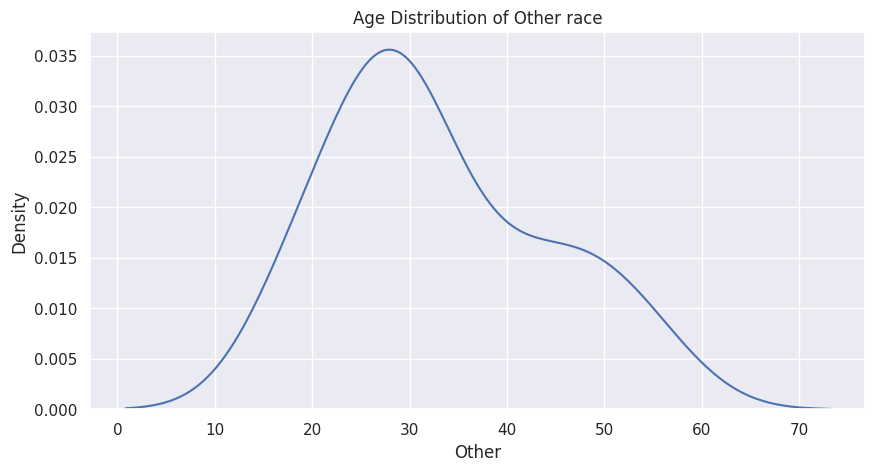

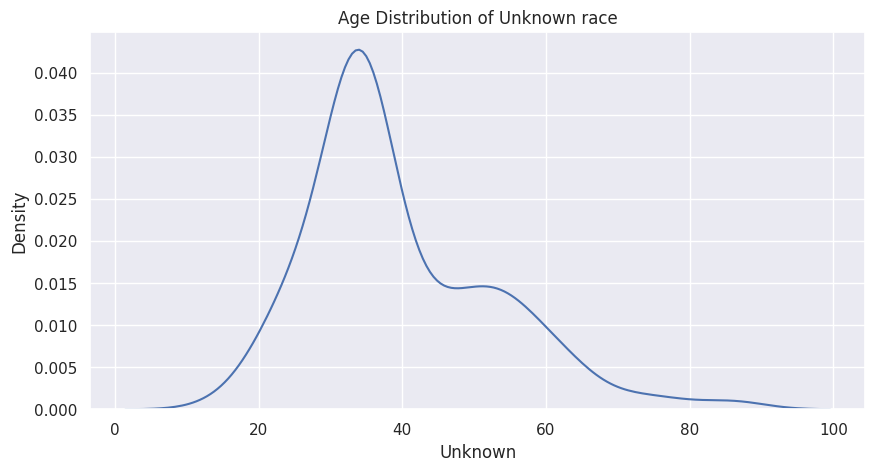

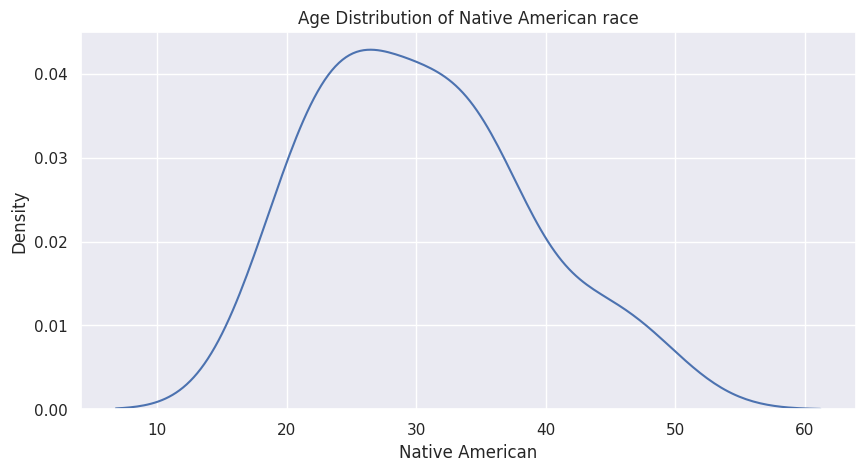

In [204]:
for pers in races_list:
    plt.figure(figsize=(10, 5), dpi=100)
    with sns.axes_style("darkgrid"):
        data_plot = df_fatalities[df_fatalities["race"]==pers]
        ax = sns.kdeplot(
            data=data_plot,
            x="age"
        )
        ax.set(
            xlabel=race_dict[pers],
            title=f"Age Distribution of {race_dict[pers]} race"
        )


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

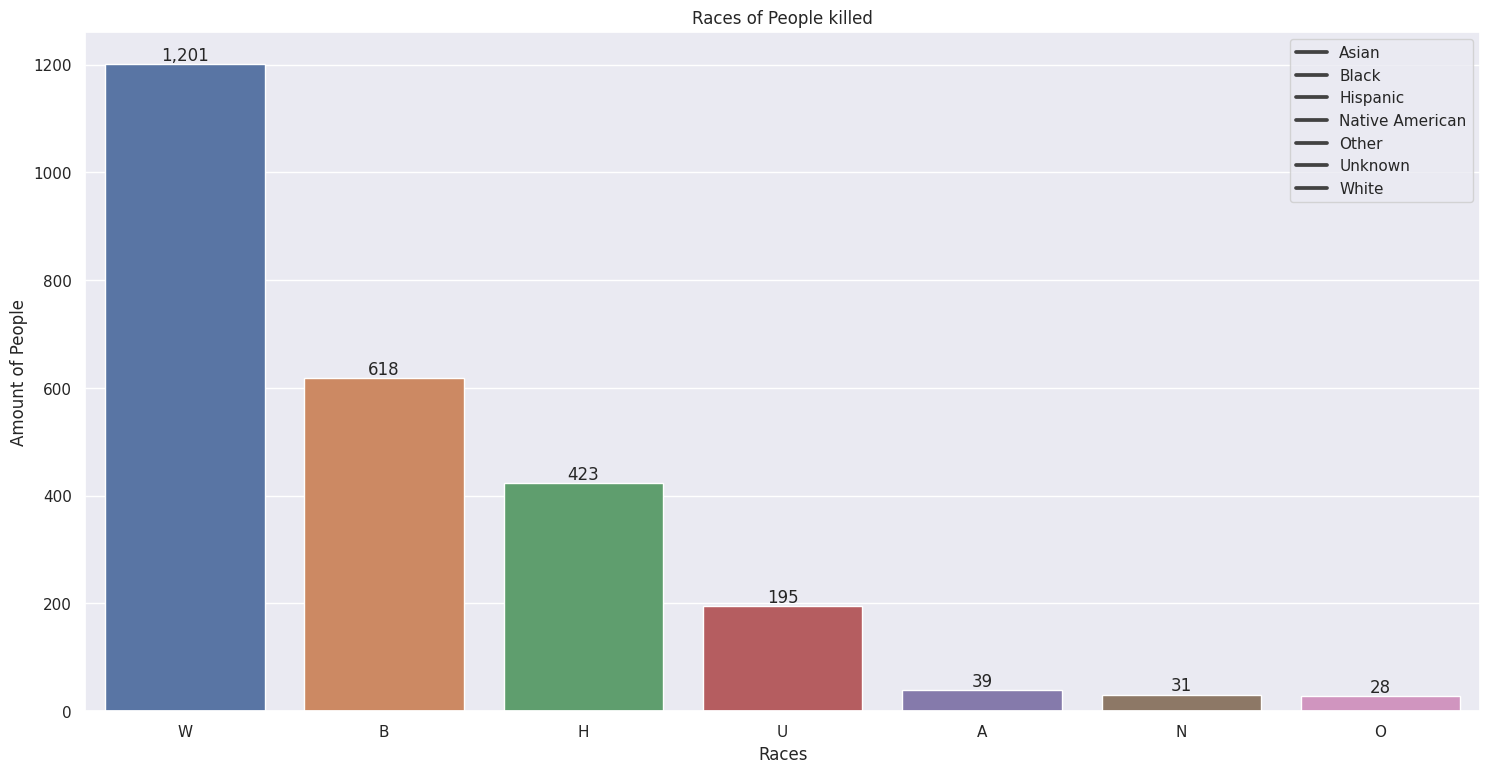

In [205]:
plt.figure(figsize=(18, 9), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.barplot(data=df_races_fat_grouped.sort_values("id", ascending=False),
        x="race",
        y="id")
    
    ax.set(
        ylabel="Amount of People",
        xlabel="Races",
        title="Races of People killed"
    )

    plt.legend(race_dict.values())
    sns.set(font_scale=1)
    
    for c in ax.containers:
        ax.bar_label(c, labels=[f"{x:,.0f}" for x in c.datavalues])

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [206]:
df_mental = df_fatalities.groupby("signs_of_mental_illness", as_index=False).count()
df_mental

,signs_of_mental_illness,id,name,date,manner_of_death,armed,age,gender,race,city,state,threat_level,flee,body_camera,weapon,agerange
0,False,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902,1844,1902,1895,1901
1,True,633,633,633,633,633,633,633,633,633,633,633,626,633,631,633


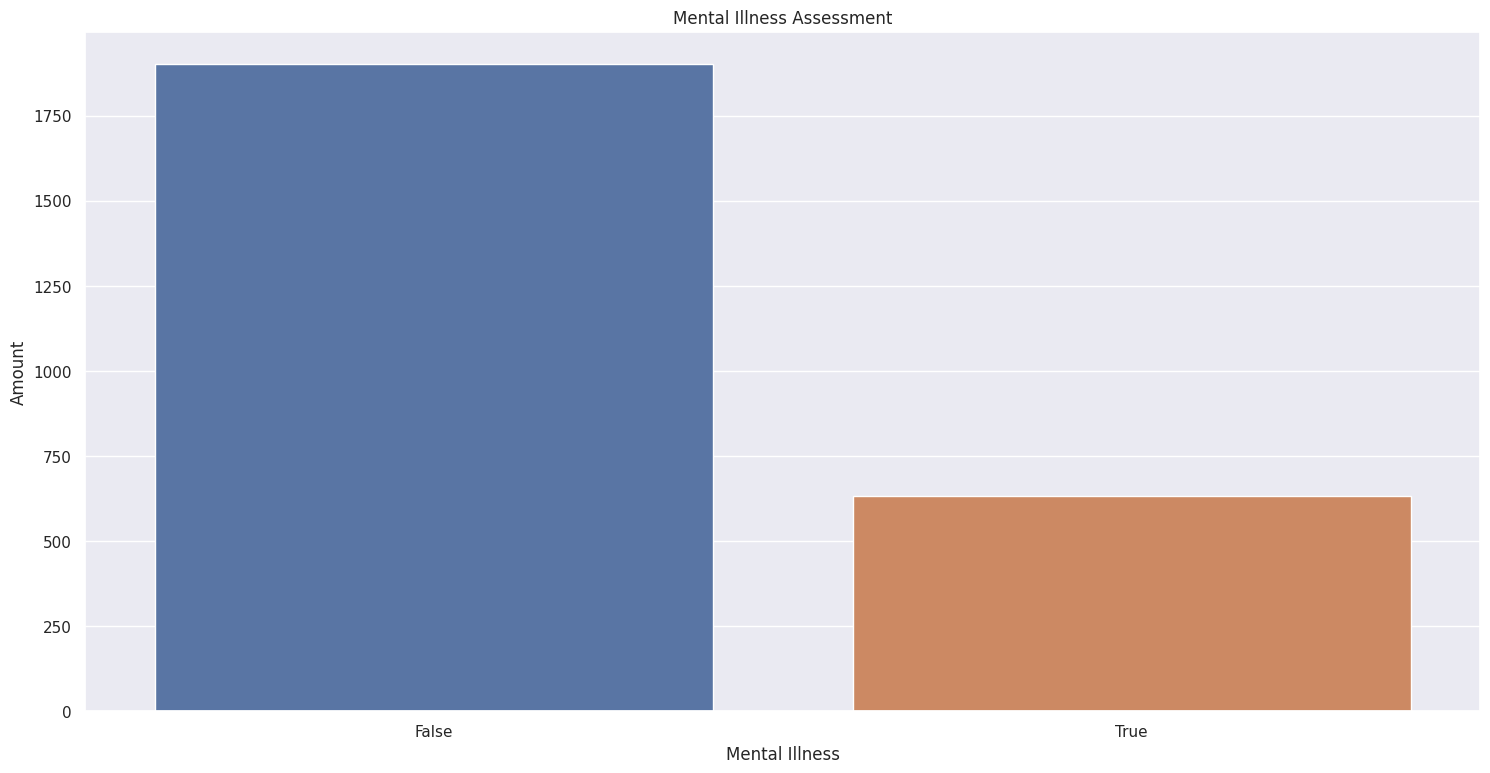

In [207]:
plt.figure(figsize=(18, 9), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.barplot(
        data=df_mental,
        y="id",
        x="signs_of_mental_illness"
    )

    ax.set(
        xlabel="Mental Illness",
        ylabel="Amount",
        title="Mental Illness Assessment")
    
    sns.set(font_scale=1)

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [267]:
df_top_cities = df_fatalities.groupby(["state", "city"], as_index=False).count().sort_values("id", ascending=False)[:10]
df_top_cities

,state,city,id,name,date,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,weapon,agerange,month_year
218,CA,Los Angeles,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
94,AZ,Phoenix,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
1314,TX,Houston,26,26,26,26,26,26,26,26,26,26,25,26,26,26,26
561,IL,Chicago,25,25,25,25,25,25,25,25,25,25,23,25,25,25,25
990,NV,Las Vegas,21,21,21,21,21,21,21,21,21,21,20,21,21,21,21
1360,TX,San Antonio,20,20,20,20,20,20,20,20,20,20,18,20,20,20,20
426,FL,Miami,17,17,17,17,17,17,17,17,17,17,15,17,17,17,17
1034,OH,Columbus,17,17,17,17,17,17,17,17,17,17,16,17,17,17,17
1274,TX,Austin,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
840,MO,St. Louis,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15


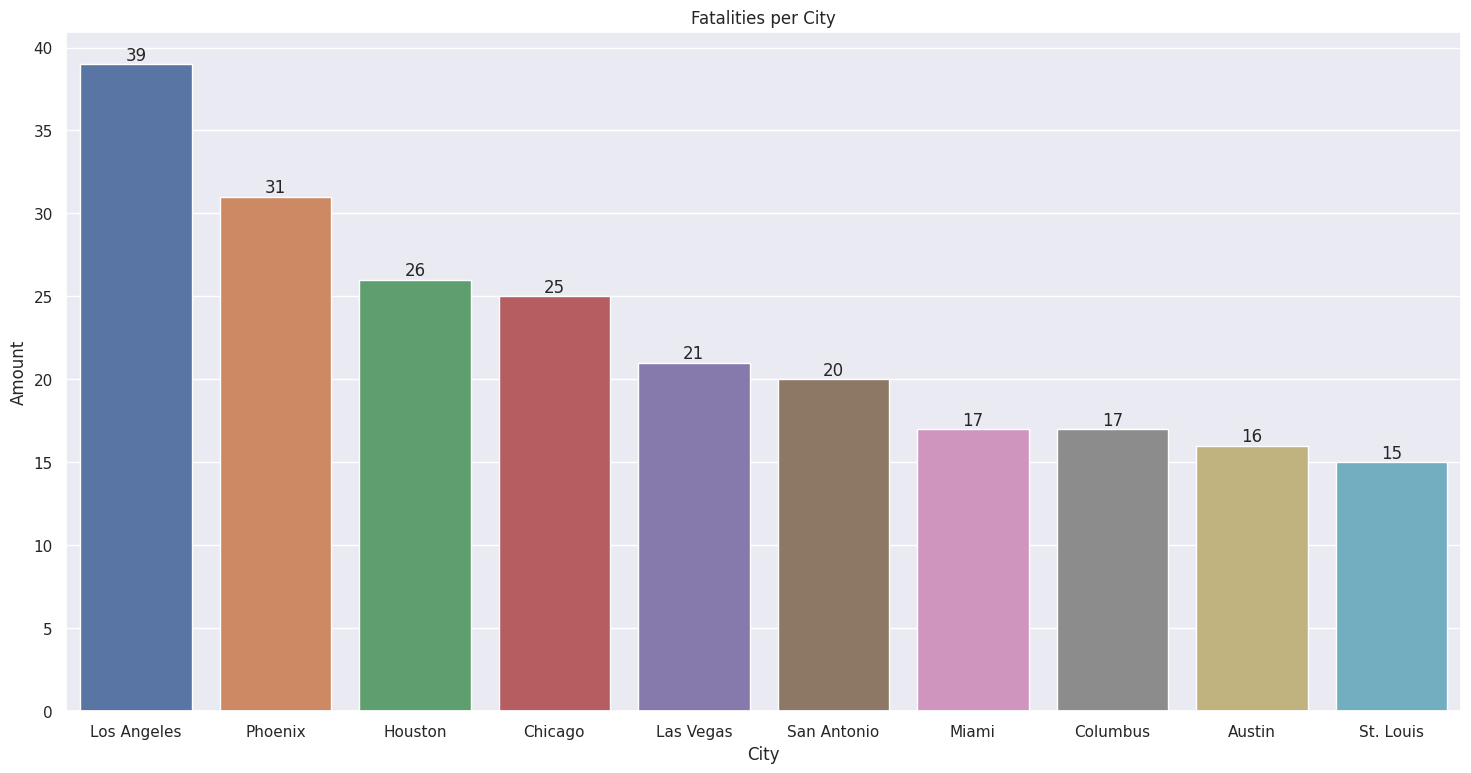

In [268]:
plt.figure(figsize=(18, 9), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.barplot(
        data=df_top_cities,
        x="city",
        y="id"
    )

    ax.set(
        xlabel="City",
        ylabel="Amount",
        title="Fatalities per City")
    
    sns.set(font_scale=1)
    for c in ax.containers:
      ax.bar_label(c, labels=[f"{x:,.0f}" for x in c.datavalues])

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [527]:
top_city_dict = df_top_cities[["state", "city"]].to_dict(orient="records")

In [452]:
for index, row in df_share_race_city.iterrows():
    for city in top_city_dict:
        if(city["city"] in row["City"] and row["Geographic area"]==city["state"]):
            df_share_race_city.loc[index, "City"] = city["city"]
            

In [567]:
top_city_list = df_top_cities.city.tolist()

In [453]:
df_top_10_races = df_share_race_city[df_share_race_city["City"].isin(top_city_list)]

In [481]:
df_top_10_races = df_top_10_races.groupby("City", as_index=False).median()

C:\Users\ajdin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.



In [483]:
for index, x in df_top_10_races.iterrows():
    x_array = np.array([float(x["share_white"]), float(x["share_black"]), float(x["share_native_american"]), float(x["share_asian"]), float(x["share_hispanic"])])
    x_norm = (x_array/np.sum(x_array))
    df_top_10_races.iloc[index, df_top_10_races.columns != "City"] = x_norm

<Figure size 1800x900 with 0 Axes>

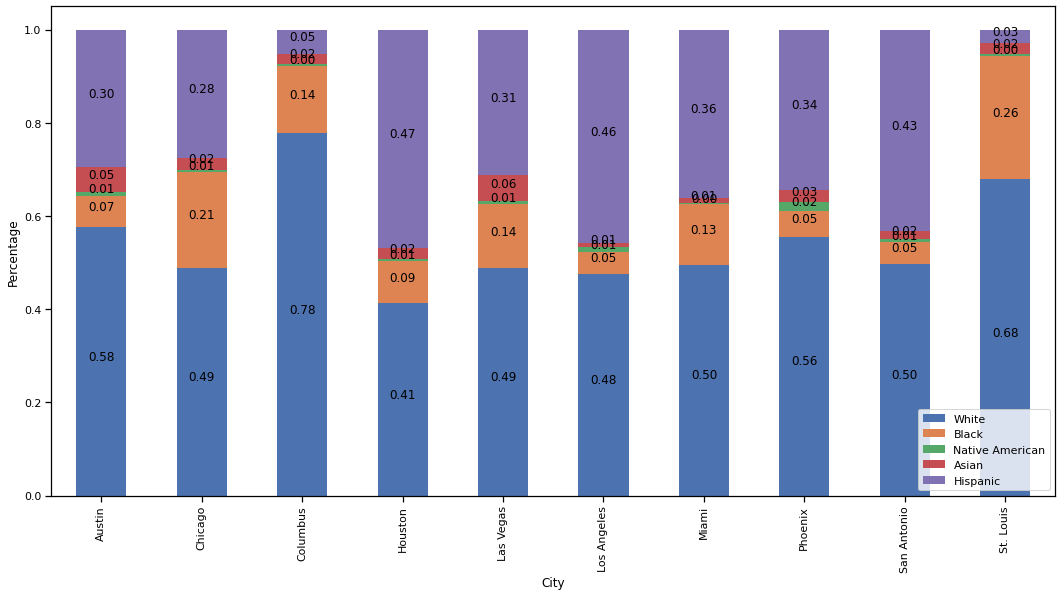

In [521]:
plt.figure(figsize=(18, 9), dpi=100)

ax = df_top_10_races.plot(
    x="City",
    y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
    stacked=True,
    kind="bar",
    figsize=(18, 9),
    ylabel="Percentage"
)

for c in ax.containers:
    ax.bar_label(c, labels=[f"{x:,.2f}" for x in c.datavalues], label_type="center", padding=5)

plt.legend(["White", "Black", "Native American", "Asian", "Hispanic"], loc="lower right")

plt.show()

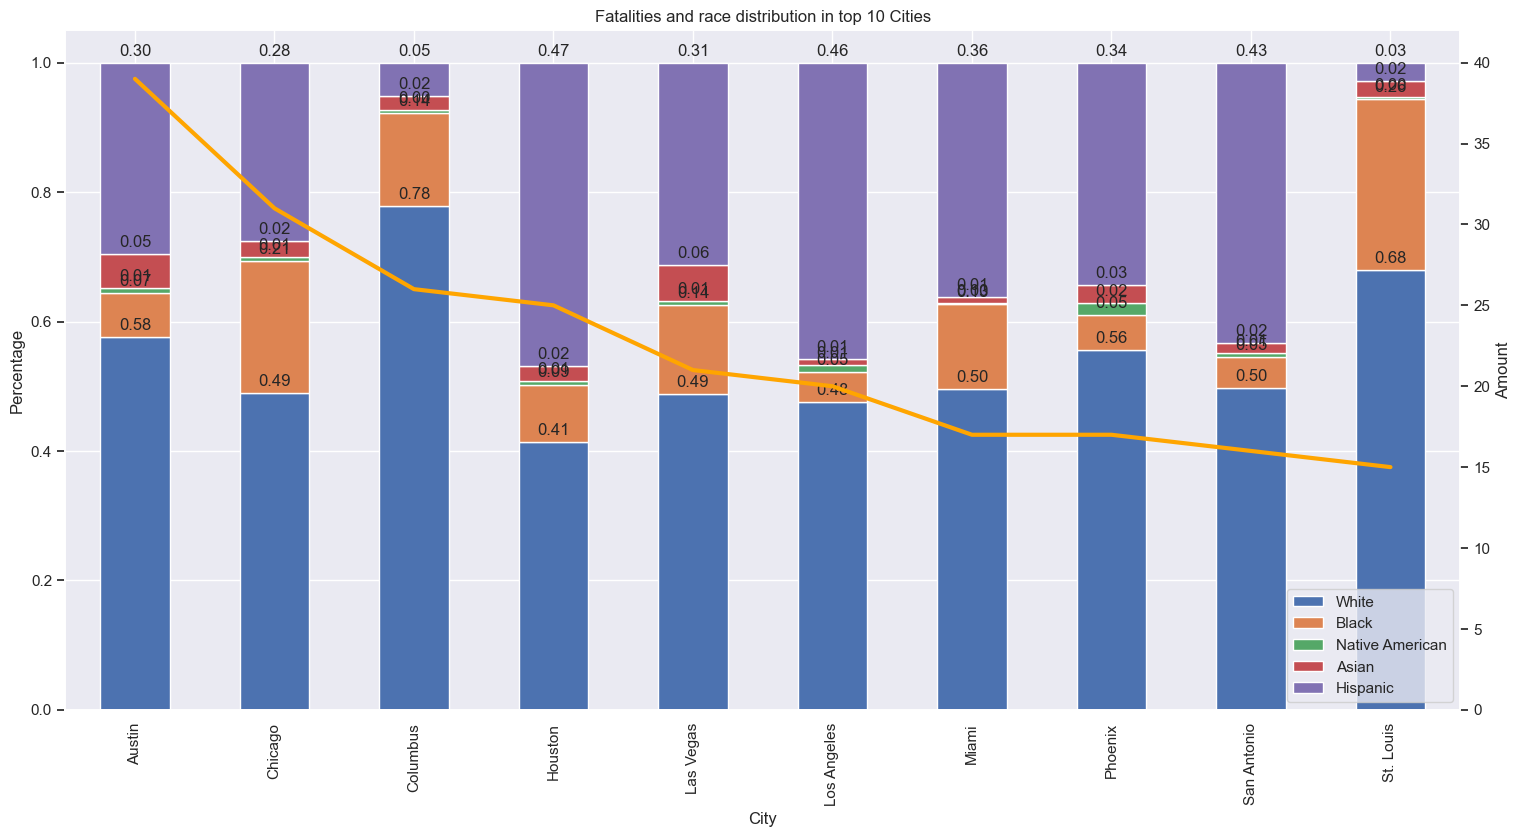

In [566]:
plt.figure(figsize=(18, 9), dpi=100)

ax1 = plt.subplot()
ax2 = ax1.twinx()
# with sns.axes_style("darkgrid"):
sns.lineplot(
    data=df_top_cities,
    x="city",
    y="id",
    linewidth = 3,
    ax=ax2,
    color="orange"
)

ax2.set(
    xlabel="City",
    ylabel="Amount")

ax2.set_ylim(0, 42)
ax2.grid(visible=False)

sns.set(font_scale=1)
for c in ax.containers:
    ax.bar_label(c, labels=[f"{x:,.0f}" for x in c.datavalues])




df_top_10_races.plot(
    x="City",
    y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
    stacked=True,
    kind="bar",
    figsize=(18, 9),
    ylabel="Percentage",
    ax=ax1
)

for c in ax1.containers:
    ax1.bar_label(c, labels=[f"{x:,.2f}" for x in c.datavalues], padding=3)

ax1.legend(["White", "Black", "Native American", "Asian", "Hispanic"], loc="lower right")
plt.title("Fatalities and race distribution in top 10 Cities")
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [215]:
cities = df_fatalities.state.value_counts()
 
usa_map = px.choropleth(cities, locations=cities.index, locationmode="USA-states", scope="usa", color=cities.values, color_continuous_scale=px.colors.sequential.matter)
usa_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [216]:
df_fatalities['month_year'] = pd.to_datetime(df_fatalities['date']).dt.strftime('%Y-%m')

In [217]:
df_fatalities.month_year = pd.to_datetime(df_fatalities.month_year)

In [218]:
df_dates = df_fatalities.groupby("month_year", as_index=False).count()

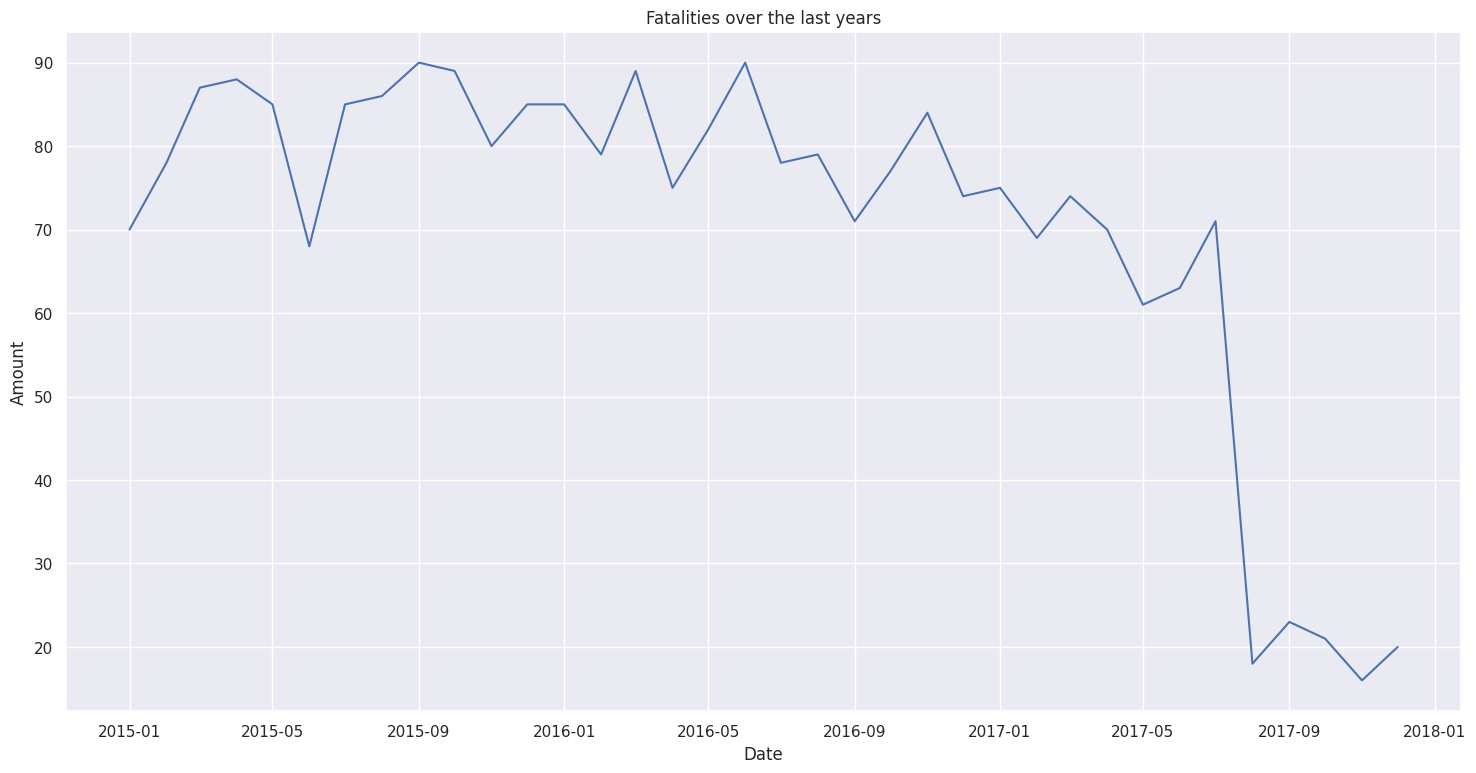

In [219]:
plt.figure(figsize=(18, 9), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.lineplot(
        data=df_dates,
        x="month_year",
        y="id"
    )

    ax.set(
        xlabel="Date",
        ylabel="Amount",
        title="Fatalities over the last years")
    
    sns.set(font_scale=1)